In [1]:
import numpy as np

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
l = 100

In [36]:
X = 2*np.random.rand(l,1)
y = 4+3*X+np.random.randn(l,1)

In [9]:
X.shape[0]

100

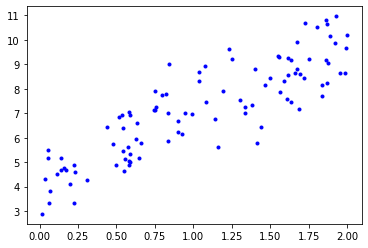

In [7]:
plt.plot(X, y, 'b.')

In [13]:
X1 = np.c_[np.ones((l, 1)), X]

In [15]:
W = np.linalg.inv(X1.T.dot(X1)).dot(X1.T).dot(y)

In [24]:
Xn = np.array([[0], [2]])

In [26]:
Xn1 = np.c_[np.ones((Xn.shape[0], 1)), Xn]

In [27]:
y_pred = Xn1.dot(W)

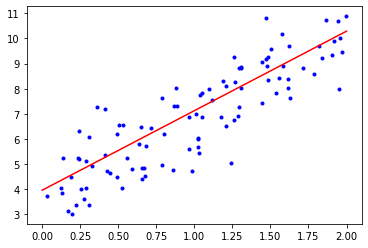

In [28]:
plt.plot(X, y, 'b.')
plt.plot(Xn, y_pred, 'r-')

In [68]:
def gd(X, y):
    Xb = np.c_[np.ones((X.shape[0],1)), X]
    n_iter = 500
    eta = 0.05
    Ws = np.random.randn(2, 1)
    for i in range(n_iter):
        grads = 2/X.shape[0]*Xb.T.dot(Xb.dot(Ws)-y)
        Ws = Ws - eta*grads
    return Ws

In [102]:
%%time
W = gd(X, y)

CPU times: user 4.02 ms, sys: 3.68 ms, total: 7.69 ms
Wall time: 6.2 ms


In [70]:
W

array([[3.72644596],
       [3.21811736]])

In [96]:
def sgd(X, y, epochs=50):
    Xb = np.c_[np.ones((X.shape[0],1)), X]
    t0, t1 = 10, 100
    Ws = np.random.randn(2, 1)
    for epoch in range(epochs):
        for i in range (X.shape[0]):
            random_ind = np.random.randint(X.shape[0])
            Xi = Xb[random_ind:random_ind+1]
            yi = y[random_ind:random_ind+1]
            grads = 2*Xi.T.dot(Xi.dot(Ws)-yi)
            learning_rate=t0/(t1+epoch*i)
            Ws = Ws - learning_rate*grads
    return Ws

In [101]:
%%time
sgd(X, y)

CPU times: user 69.7 ms, sys: 0 ns, total: 69.7 ms
Wall time: 68.7 ms


array([[3.6211053 ],
       [3.29626305]])

In [87]:
np.random.permutation(X.size)

array([99, 35,  6, 34, 86, 85, 78, 57, 63, 56, 25, 13, 96, 10, 31, 79, 26,
       36, 90, 88, 93, 14, 94, 50,  1, 52, 73, 51, 83, 68, 60, 42, 41, 77,
       12, 47, 44, 30, 66, 46, 22, 74,  2, 37, 29, 55, 54, 33, 82, 62, 45,
        7,  8,  4,  5, 23, 67, 97, 71, 18, 59, 48, 98, 43, 53, 80, 21, 27,
       69, 84, 19, 49, 39, 65, 58, 16, 87, 20, 89, 24, 81, 95, 75, 17,  9,
       28, 64, 92, 91, 70, 11, 32, 61, 72,  0,  3, 15, 40, 76, 38])

In [98]:
def minibatchgd(X, y, epochs=50, batch_size=10):
    Xb = np.c_[np.ones((X.size,1)), X]
    t0, t1 = 10, 100
    Ws = np.random.randn(2,1)
    for epoch in range(epochs):
        shuffled_ind = np.random.permutation(X.size)
        Xsh = Xb[shuffled_ind]
        ysh = y[shuffled_ind]
        for i in range(0, X.size, batch_size):
            Xi = Xsh[i:i+batch_size]
            yi = ysh[i:i+batch_size]
            grads = 2/batch_size*Xi.T.dot(Xi.dot(Ws)-yi)
            learning_rate = t0/(t1+epoch*i)
            Ws = Ws - learning_rate*grads
    return Ws

In [100]:
%%time
Ws = minibatchgd(X, y)
Ws

CPU times: user 9.59 ms, sys: 80 µs, total: 9.67 ms
Wall time: 9.2 ms


array([[3.83189745],
       [3.21561556]])